In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
from google_play_scraper import Sort, reviews_all

In [4]:
def scrape_reviews(app_id):
    reviews = reviews_all(app_id,
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with=1
    )
    return reviews

In [5]:
df_practo = pd.DataFrame(np.array(scrape_reviews('com.practo.fabric')),columns=['review'])
df_practo = df_practo.join(pd.DataFrame(df_practo.pop('review').tolist()))
df_practo.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHzIKMBpBfOmHdmvBGb3PyVfg9WBqUX359o6gv...,Manideep Paturu,https://play-lh.googleusercontent.com/a-/AOh14...,Really bad app coding. The doctor cannot call ...,1,7,5.21.1,2021-10-29 19:24:55,"Hi, apologies for the inconvenience. Please co...",2021-11-10 18:00:51
1,gp:AOqpTOG-d6LdrSMOCXIsKdEtvIwdzVUb6dcl7-iHN3r...,Anvesh Reddy Chinthareddy,https://play-lh.googleusercontent.com/a-/AOh14...,Worst ever service. Never order medicine from ...,1,18,5.9.1,2021-07-10 08:38:02,"Hi, we understand that you are unhappy with ou...",2021-07-22 10:26:15
2,gp:AOqpTOEh9_QgjTWU5G3uFoHn8vfRlZudujP3QTx_Gfn...,Shishir Kumar,https://play-lh.googleusercontent.com/a-/AOh14...,"In case you take any subscription plan, Practo...",1,6,5.9.1,2021-07-10 18:50:19,"Hi, we understand that you are unhappy with ou...",2021-07-22 10:35:46
3,gp:AOqpTOFeoQL0ItpraufW_JyN2GeChUHdCo1ybHN25Bz...,priyanka dungriyal,https://play-lh.googleusercontent.com/a-/AOh14...,"The doctors are great. However, the customer s...",1,0,None,2021-10-02 20:47:45,"Hi, we understand that you are unhappy with ou...",2021-10-18 13:04:21
4,gp:AOqpTOGOihV1iyozIzpPJGW5iIKFylHo6Eh5rV43hr1...,Sujay kumar,https://play-lh.googleusercontent.com/a-/AOh14...,One worst point that can be easily be easily f...,1,0,None,2020-07-13 15:16:53,"Hi, we are really sorry to hear this. Please s...",2020-07-15 18:55:50


In [6]:
df_practo.shape

(8955, 10)

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [8]:
import nltk
stemmer = nltk.PorterStemmer()

In [9]:
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = set(stopwords.words('English'))

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            """if self.lemmatizing:
                lem_words = []
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words.append(word_lemma)
                text = lem_words
                """
            if self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [12]:
text_processor = TextProcessor()
data = text_processor.fit_transform(df_practo['content'])
data

array([Counter({'realli bad': 1, 'bad app': 1, 'app code': 1, 'code doctor': 1, 'doctor cannot': 1, 'cannot call': 1, 'call neither': 1, 'neither call': 1, 'call alway': 1, 'alway get': 1, 'get miss': 1, 'miss call': 1, 'call notificarion': 1, 'notificarion instead': 1, 'instead call': 1}),
       Counter({'worst ever': 1, 'ever servic': 1, 'servic never': 1, 'never order': 1, 'order medicin': 1, 'medicin practo': 1, 'practo acknowledg': 1, 'acknowledg prescript': 1, 'prescript doctor': 1, 'doctor consult': 1, 'consult app': 1, 'app delay': 1, 'delay medicin': 1, 'medicin order': 1, 'order week': 1, 'week say': 1, 'say prescript': 1, 'prescript valid': 1, 'valid older': 1, 'older week': 1, 'week irrespect': 1, 'irrespect mistak': 1, 'mistak cancel': 1, 'cancel delay': 1, 'delay multipl': 1, 'multipl time': 1, 'time later': 1, 'later yet': 1, 'yet receiv': 1, 'receiv order': 1, 'order even': 1, 'even day': 1, 'day custom': 1, 'custom servic': 1, 'servic number': 1, 'number chat': 1, 'ch

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_practo['content'])

In [23]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=4, n_init=1)

In [24]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [70]:
for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
         print(' %s' % terms[ind])

Cluster 0:
 doctor
 consultation
 practo
 appointment
 money
 app
 online
 experience
 doctors
 paid
 time
 bad
 video
 worst
 booked
 chat
 feedback
 don
 just
 available
Cluster 1:
 bad
 service
 order
 doctors
 medicine
 practo
 experience
 good
 customer
 pathetic
 poor
 don
 app
 medicines
 time
 delivery
 support
 dr
 available
 appointment
Cluster 2:
 worst
 app
 service
 experience
 delivery
 customer
 support
 medicine
 don
 doctor
 seen
 doctors
 application
 reply
 consultation
 money
 services
 ordering
 waste
 download
Cluster 3:
 app
 waste
 money
 don
 time
 doctors
 use
 useless
 worst
 bad
 fake
 appointment
 just
 doctor
 dont
 fraud
 install
 download
 practo
 consultation


In [71]:
issues = [ 'Booking and technical delays',
          'Customer support',
         'Services and test issues',
         'Payment issues',
         ]

In [72]:
df_practo['Issues'] = model.predict(X)

In [74]:
df_practo['Issues'].value_counts()

1    4853
0    2161
3    1664
2     277
Name: Issues, dtype: int64

In [78]:
vocabulary_size=1000
total_count = Counter()
for word_count in data:
    for word, count in word_count.items():
        total_count[word] += count#min(count, 10)
most_common = total_count.most_common()[:vocabulary_size]
vocabulary = {word: count for index, (word, count) in enumerate(most_common)}

In [79]:
vocabulary

{'worst app': 605,
 'book appoint': 455,
 'custom care': 375,
 'order medicin': 358,
 'onlin consult': 349,
 'bad experi': 345,
 'consult doctor': 309,
 'use app': 276,
 'wast time': 265,
 'worst experi': 260,
 'wast money': 254,
 'doctor avail': 216,
 'custom servic': 212,
 'custom support': 177,
 'worst servic': 172,
 'video consult': 162,
 'video call': 160,
 'useless app': 156,
 'doctor consult': 145,
 'app ever': 144,
 'review doctor': 139,
 'doctor repli': 137,
 'app doctor': 136,
 'pathet servic': 135,
 'doctor respond': 135,
 'appoint doctor': 129,
 'cancel order': 128,
 'practo app': 114,
 'consult fee': 114,
 'take money': 112,
 'poor servic': 107,
 'use practo': 102,
 'pathet app': 102,
 'doctor practo': 100,
 'feedback doctor': 100,
 'time money': 99,
 'experi doctor': 97,
 'instal app': 96,
 'practo plu': 95,
 'cancel appoint': 94,
 'doctor even': 94,
 'doctor app': 94,
 'medicin order': 93,
 'bad servic': 90,
 'neg feedback': 90,
 'paid consult': 86,
 'refund money': 85,


Most common mentioned phrases and terms 

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor2(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            word_counts = Counter(text)
            if self.lemmatizing:
                lem_words = Counter()
                for word,count in word_counts.items():
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words[word_lemma]+=count
                
            """f self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [88]:
text_processor2 = TextProcessor2()
word_counts = text_processor2.fit_transform(df_practo['content'])

In [89]:
vocabulary2 = Counter()
for item in word_counts:
    for word,count in item.items():
        vocabulary2[word]+=count

In [106]:
vocabulary2.most_common()

[('app', 4381),
 ('doctor', 3735),
 ('practo', 2281),
 ('doctors', 1989),
 ('money', 1632),
 ('worst', 1512),
 ('time', 1429),
 ('consultation', 1397),
 ('appointment', 1308),
 ('service', 1233),
 ('even', 1149),
 ('experience', 1114),
 ('medicine', 1004),
 ('bad', 983),
 ('order', 937),
 ('customer', 909),
 ('online', 792),
 ('one', 780),
 ('call', 772),
 ('get', 768),
 ('use', 700),
 ('days', 687),
 ('chat', 674),
 ('waste', 650),
 ('never', 643),
 ('support', 639),
 ('pathetic', 627),
 ('available', 614),
 ('medicines', 601),
 ('paid', 594),
 ('also', 591),
 ('dr', 576),
 ('good', 574),
 ('booked', 518),
 ('please', 517),
 ('give', 510),
 ('refund', 501),
 ('got', 498),
 ('care', 498),
 ('reply', 482),
 ('payment', 473),
 ('feedback', 465),
 ('people', 459),
 ('take', 451),
 ('response', 440),
 ('prescription', 438),
 ('option', 434),
 ('dont', 427),
 ('delivery', 421),
 ('u', 419),
 ('poor', 414),
 ('video', 399),
 ('clinic', 395),
 ('ever', 392),
 ('fake', 389),
 ('book', 386),
 (

In [91]:
X = df_practo.copy()
X['keyword'] = word_counts

In [107]:
issue_areas = ['notifications', 'prescription',  'appointment', 'medicine', 'chat', 'call', 'refund', 'feedback', 'delivery', 'ui', 'membership']

In [113]:
issue_counts={}

for issue in issue_areas:
    count = 0
    for x in X['keyword']:
        if issue in x.keys():
            count+=1
    issue_counts[issue]=count

## 
## A deeper analysis into reviews
## 

In [40]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize
import docx2txt

def get_phrases_containing_word(target_word, passage, left_margin = 10, right_margin = 10):
    tokens = nltk.word_tokenize(passage)
    text = nltk.Text(tokens) 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([text.tokens[list(map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset]))[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [41]:
def get_phrases(word):
    doc = ' '.join(df_practo['content'])
    results = get_phrases_containing_word(word, doc)
    for result in results:
        print(result)

In [118]:
get_phrases('system')

sufficient time for their delivery system to work .The delivery person does n't even pick 
call me and practo support system also not working there is no way to contact 
app because of their communication system to too much useless . For normal test , 
nothing apart from sending you system generated messages . They are getting some special training 
. Very disappointed with this system to simply steal money with minimal service . Booked 
loaded in the cart , system shows `` no cart '' and hangs . No 
about customer . Cash collection system is very poor . Not systematic at all . 
bad experience . The whole system is terrible . Doctors do n't respond . Follow 
chat box . Support Chat system is super slow in response and mostly it is 
is horrible . The chat system being the only mode of communication needs to be 
hour there will be a system generated message hello ... After that the same thing 
of all , there support system is very pathetic . They does n't give reply 
single penny . ridic

In [119]:
get_phrases('filter')

I dont know how they filter these Dr before making visible to public .. worst 
says 24/7 consultation . The filter is just for the next 7 days . There 
doctor and in a way filter out negatuve feedbacks . totally biased site that can 
tie up with doctors to filter out the negative reviews . After payment no support 
NOT GIVEN .. THEY ALOMST FILTER IT .. Totaly money and time wasting.🤬🤬🤬🤬😡 I lost 
just positive ones ..... they filter out negative reviews ...... You are showing discount on 
stop using practo Need language filter unless useless app Linked in wallets never work .. 
this profession they must not filter review . They are playing with lives of people 
. 2 ) Create a filter for negative feedback and the feedback comments should be 
No reply for questions.uninstalling .. Filter sucks and money based ratings Satara city not there 
app Bakwaaaaas Super Waste Good Filter by distance is showing wrong info . while i 
to sort on rates , filter does n't provide all localities . Is this

In [121]:
get_phrases('preference')

patients does n't have any preference anyways . Looters , i ordered a medicine with 
the doctors for the same preference . No use of asking for language preference in 
use of asking for language preference in such case . Atleast you should ask user 
doctors found with the language preference . After consultation created and if found that doctor 
questioned . # SayNOtoPracto Extraordinary preference to MBBS doctors or let 's say Intentionally Putting 
choose from , we should preference for the type of doctor we want to consult 
choose doctor as per my preference . I am getting doctors with less experience There 


In [45]:
get_phrases('payment')

pay option it was throwing payment failed message . I even not selected any payment 
I even not selected any payment method - dont know why it was throwing that 
issues and still ask for payment even if you have plus plan . then you 
start medicines immediately . Online payment for test and diagnosis along with doctor follow up 
2 : After making the payment it says `` payment failed technical error '' . 
the payment it says `` payment failed technical error '' . But actually payment gets 
error '' . But actually payment gets deducted from bank account . The error message 
Healthcash gets deducted everytime the payment fails and is returned back after days . Delivery 
practo so far regarding the payment made . Worst customer care service ! ! ! 
could n't even make a payment using it . Very poorly developed by amateur developers 
get reply vry late Online payment issue , not accept online payment via credit debit 
issue , not accept online payment via credit debit card . Complaint many t

In [46]:
get_phrases('account')

payment gets deducted from bank account . The error message is completely misleading . Its 
wallet money in to your account . Whenever we book an appointment on practo they 
I have a practo plus account but service s disgusting . Customer cares are not 
deducts the money from your account and show the fake error message that they have 
later when you check your account your account got empty , because all the charges 
you check your account your account got empty , because all the charges you authrised 
received by practo and your account debited thrice ( it could be more ) Worst 
. This is for corporate account . : ( OTP on call is working now 
it gets debit from my account but it near reflects in your App ... A 
rs debited twice from my account i recieved 2 msgs from bank about amont deduction 
also Rs.299 deducted from my account app not working properly😡😡 Booked a video consultation today 
was debited from my bank account and credited in Practo account but it shows payment 
account

In [47]:
get_phrases('receipt')

. 3. they send you receipt in an email which is not valid anywhere . 
ask for a valid original receipt . 4 . I have reached them via contact 
got message from Doctor saying receipt loaded and watsup confirmation on appointment and then after 
doctor should keep booking , receipt and prescription on the app and keep all records 
for issuing a prenumbered payment receipt for my test order no PRA-040137 . I am 
through PRACTO . No Fee receipt has been given so far . It is totally 
no option to download payment receipt . I feel for time being its good but 


In [48]:
get_phrases('interface')

Their mobile app and web interface is a joke . You ca n't book a 
blood type Horrible , user interface . Hard to find download invoice option in application 
fix this issue ASAP ! Interface to differentiate between online and offline consultation is worst 
. Horrible app . Horrible interface and horrible doctor . The doctor I was consulting 
No proper support , the interface is n't clear . You will be just paying 
350 for maybe accessing the interface which is definitely not worth the time and money 
app is nothing but a interface to fool both doctors and patients . Un-reliable and 
most useless app with poor interface . Book a test and leave it to god 
care Support Practo has no interface with the doctor 's office . It jeeps sending 
Size and very bad user interface This app used to be awsome when they were 
4g conection . Customer support interface is very bad . After 30 minute of hard 
this Irritating app with poor interface . Unable to understand where to go from where 
bring back 

In [49]:
get_phrases('booking')

not use practo for lab booking at least for RCPTR ( in case of emergency 
moved to web application for booking appointment . Their mobile app and web interface is 
non responsive app . After booking test , the test got cancelled from practo side 
Then whats the point of booking appontment using app . Not a good experience ! 
money got deducted twice while booking instant video consultation but did not get the confirmation 
really waste of time for booking in this app . Nearly 1hour and 30 minutes 
Make sure to Google before booking on practo . All are money making business ... 
from the whole point of booking appointment based on your availability . Did not bother 
's functionality . I tried booking an appointment with Practo as my doctor only does 
this worthless app . Tried booking an appointment which was priced at 680 . Their 
reports are ready . My Booking no . PRA-266080 time given 6 am to 7 
said I can cancel my booking . If this is what you 've opened this 
There cancellation p

In [50]:
get_phrases('refund')

multiple times . Also their refund policy is absurd . They wo n't refund the 
absurd . They wo n't refund the money until the order is delivered and they 
not heary issue , no refund provided , Dr. Sunilkumar Baranwal doctor receving call while 
Never ordering again . Kindly refund the money and take your fake medicines back . 
pm msg recieved order cancelled refund initiated bcos delivery agent could n't contact . Absolutely 
. Appointment cancelled , No refund yet , no any call back , old comments 
. I have asked for refund which is awaited I placed medicine order on 8th 
first they said that the refund will reflect in 4-5 days , after 4-5 days 
I have not received my refund yet even after a week . Return is a 
partially processed and payment not refund after cancellation of order id - 1075615 It 's 
are a joke . Full refund if you cancel within 2 hours but you just 
experience with practo regarding my refund and I am chasing for the same from more 
. Very Poor Experience for Refund 

In [51]:
get_phrases('user')

. I am first time user . Downloaded app today and it was showing 237rs 
Very disappointed . Very poor user experience , the app does n't show medicine info 
for many days . Worst user friendly app . Wanted to search for an appointment 
. Worst UI . Not user friendly at all . I ca n't get my 
. Atleast you should ask user before proceeding , if no doctors found with the 
their blood type Horrible , user interface . Hard to find download invoice option in 
. Terrible app . Terrible user experience . Terrible medicine delivery . Only the doctor 
good app . And all user must switch to another app , and boycott the 
Very bad app , no user support , even not designed as user friendly The 
, even not designed as user friendly The app has become useless . In the 
for physical appointment . Old user and now a very disappointed user . All doctors 
and now a very disappointed user . All doctors are belongs to Tamilnadu and bangalore 
for the app ! Not user friendly app . Book appointment link sho

In [52]:
get_phrases('setting')

they asked to change network setting , logout and login , restart the phone . 
itself is not present in setting I tried payment options many time but everytime it 
my complain in there help setting but it 's is not working they are showing 
practo , the have kinda setting with practo and charging way higher then usual cost 


In [53]:
get_phrases('email')

utterly useless . If you email them they 'll ask you to use the chat 
they 'll ask you to email them . Are your support staff being paid just 
was not sent over on email . They should work on customer experience ! Very 
medicines . Got sms and email that medicines delivered . But did n't receive the 
do n't ask me to email my complaint . I have already done that . 
please mail us on ....... Email and we will be happy to assist . ' 
do they reply to the email asking to seek assistance on chat and ending up 
care . When we drop email only reply comes that they will take care . 
send you receipt in an email which is not valid anywhere . Plus there is 
. Tried to send an email , it got failed . What kind of app 
customer care contact number or email . I had paid for my consultation and have 
and I received sms and email with the consultation link . On May 17 when 
we tried to communicate via email by still no response : ( Very bad experience 
through this apps . Confirmed email booking is 

In [54]:
get_phrases('setup')

I assume to have had setup it 's standards high in online healthcare services.I wonder 
basically trained like bots InCorrectvexpectation setup , will be logging a complaint soon . I 


In [55]:
get_phrases('chat')

number . You have to chat and for every message response time is 5min to 
40 minutes in a single chat . Which is super frustrating One worst point that 
. _ no notifications of chat when following up a doctor . Why it was 
automated bots replying on support chat . No real time updates . My medicines order 
by the end of the chat gave me the same medication , even the support 
. When I contacted the chat support they are giving all standard replies like change 
go back to the initial chat with the doctor . Very slow repsonse and terrible 
on their timeline ... Horrendous chat help agents . No idea how to help the 
to contact except the clueless chat agents . Well they claim less than 30 mins 
I asked customer service in chat they said `` As , check There is tech 
7 day follow up in chat not through call to the same doctor . I 
daughters health nxt day through chat but the respond i received was nxt day from 
times . Simply horrible . Chat support service is awful . Doctor has not shared

In [56]:
get_phrases('facility')

systematic at all . No facility tu talks customer care department through phone Giving less 
bare the medicine price Discount facility are available in only metros only , Better to 
do n't have upto date facility , if doctor available or not but appointment charge 
client . Unistalled . This facility is good .. but call connectivity is the real 
have a customer executive calling facility . Their followups are mechanised and lacking in empathy 
scam with the covid test facility . Prescriptions and reports are not uploaded seamlessly .. 
time visitor , gets First50 facility . Then i press to take an app . 
they back me , first50 facility , that means Ist vistor payable 50 % only 
they dont have a calling facility and you are dependent mercy of chat support which 
. Stupid app . No facility of calling the customer care . Your bookings can 
is replying no customer care facility . This is worst app Worst app .. received 
there is no free chat facility . I cant understand the meaning of prac

In [57]:
get_phrases('technical')

and they have lot of technical issues and still ask for payment even if you 
it says `` payment failed technical error '' . But actually payment gets deducted from 
. Very Bad Customer and technical Support- Video call never worked from day one and 
support on call to troubleshoot technical issues . WORST EXPERIENCE I had the practo plus 
her due to your application technical issues it kept showing me fetching conversation . Bad 
never booked ! Oops ... Technical glitches .... Stupid app ! Worst Service I have 
while it is Practo s technical error , they ca n't do anything about the 
happening . Very disdpointed with technical compitency of this application . Pathetic service worst experience 
She said there was a technical problem . It 's really very bad experience because 
do n't agree to their technical flaws within their app . Thankfully I paid for 
the doctor as well as technical support . I do not recommed this app Useless 
. Please check with ur technical team , cart amount and 

In [58]:
get_phrases('bug')

is full of bugs . Bug 1 : App doesnot allow to upload pdf report 
kill application and restart . Bug 2 : After making the payment it says `` 
.. Even after reporting the bug there was no response .. I think this is 
loading . there is a bug that when i upload an attachment like pdf or 
the app due to a bug in phone all my medical records r lost , 
the app has lot of bug i could n't use my phone for 2 days 
chat history there is a Bug One of the worst experiences ! The doctor did 
. Also there is a bug in app Horrible experience booking from this app . 
check if it is a bug from practo side * * * Practo assumes that 
private . That 's some bug ? इस app के जरिये आप दवाएं सिर्फ बेंगलुरु 


In [59]:
get_phrases('server')

n't have a central database server it seems , cause the data are never in 
be saved compulsorily on their server whereas Flipkart , PayTM etc make it optional . 
not able to connect with Server .. Only buesiness minded app The contract numbers are 
for HDFC and ICICI Alway server encounter error or session expired I took the paid 
by disguising customers not to server customers . I had placed medicines for my 65 
should be not be chargeable Server down can not do consultation without consent of patients 


In [60]:
get_phrases('segment')

feedback is put in the segment that says `` does not meet our feedback criteria 


In [61]:
get_phrases('crashed')

in between consultation your app crashed and now neither I can see the consultation and 
just the miserable app getting crashed on opening Reminder not working even after autostart Worst 
consult freshers/ medical students App crashed suddenly a doctor named akshay amarnath mirajker in practo 
Irerevelant doctors and application gets crashed a lot Its a worst app.Never allowed me to 


In [62]:
get_phrases('loading')

. Payment page is not loading , so not able to use practo cash Medicine 
doctor by it was not loading the conversation and prescription .. I tried rebooting the 
but doctor chat is not loading . I am ping you in customer care char 
results .. It keeps on loading and never shows result for Doctors nearby . I 
a consultation , it keeps loading . I received messages from doctors in notification but 
page where my conversation is loading . there is a bug that when i upload 
option will go in infinite loading mode.You can talk continuously to the help center and 
the consultation and neither its loading .. you customer service personal asks me about when 
app it freezes on the loading screen . Do n't take online consultation they fooling 
... Chat conversation is not loading and doctor is not available to give my prescription 
when It opens It keeps loading but never finish loading.Hating this please fix it . 
work .. everything is just loading since long .. Dr.even not Care what happen to 

In [63]:
get_phrases('window')

the call at given appointment window . I am first time user . Downloaded app 
main page from the chat window without rating the doctor . Should make it optional 
and Practo free follow up window is only up to 7 days . Looks something 
, the doctor closed my window forcefully and also was very rude while talking . 
, specifically related to chat window . You ca n't use their chat feature . 
3 days and close the window within 3 days . If you need consultation again 
our protocol '' only chat window is the option to contact with them . Docs 
time I visit his chat window , I am asked to rsthe the experience - 
retrieve any thing from chat window .I chat with Doctor yesterday and unable to get 
App not working . Chatting window is not opening . Not even able to raise 
on site .... in chat window and report section as well .. more than 12 
app , aupport team chat window pathatic , her support member not replying in time 
minimized my zoom video call window and kept doing her work on her PC .

In [64]:
get_phrases('query')

support I have raised a query at around 11 am and received a response at 
told me that if any query means contact to my number or message me i 
u dont reply , the query is closed . Cheaters ... No option to reschedule 
, misleading information and poor query resolution . Absolutely terrible experience with this app . 
was bad for follow up query . They do not reply soon . The chat 
had posted all details of query even then the doctor replied with hello the next 
n't even replies to your query . The status of doctors shown in the app 
on phone to get the query solved but phone is not connecting to ant represrntstive 
customer support to reply on query , which took more that 1.5 hours to get 
time to reply to patients query . Useless APP . Bad customer service experience . 
the app and loose the query trail . Second query session is also not being 
the query trail . Second query session is also not being responded to . Did 
days I have asked my query . Now aap says if I want another cons

In [65]:
get_phrases('platform')

of the medicine . Wonderful platform for so-called doctors . I had a bad experience 
do not use this digital platform for any kind of requirements you are looking for 
appointments Unethical practices on this platform . You pay and consult first time with the 
It is a useless service platform . Totally unprofessional and tend to cheat . Be 
Wil give feedback on every platform . [ 1541043 ] Extremely unrealiable app , doctors 
consultant the doctor use this platform but do n't take the medicines , waste of 
plan . Practo is a platform which has no responsibility if their customer trapped with 
book any service from their platform . Such an unprofessional team they have and even 
Technically it maybe a decent platform but information about doctors attached to different clinics is 
Simply looting people with smart platform , no use of this app . Do n't 
to have to .. Worst platform there is no value for users feelings and money 
trust you people , This platform may be good in terms of doc

In [66]:
get_phrases('notification')

i asked but got no notification from doctor . So i hesitated but took the 
buggy , The video call notification is very inconsistent and sometimes attaching documents is a 
box does n't load . Notification of new messages are there but when you open 
If an app has a notification we know that an action may be needed from 
they did n't get any notification from practo about appointment ... but it 's a 
but they removed without any notification . Now , it 's a useless fees that 
I did not get any notification even when app was open . Same problem with 
Worst application havent got any notification or any calls from the support team to resolve 
The app just spams the notification centre with offers daily . It 's just so 
way to silence offers in notification settings of the app , there is just one 
's presentations and other important notification . They are all clubbed together . Had a 
got the confirmation and reminder notification , applied a leave for the day , took 
situation , I get a

In [67]:
get_phrases('updates')

chat . No real time updates . My medicines order on 27th Nov is still 
go wrong ? For multiple updates throughout this and previous year , the app 's 
Very poor application no any updates is showing and also there customer support is very 
work on , not on updates for the app ! Not user friendly app . 
not contact you to provide updates , no support is actually provided from their side 
lot of time with no updates provided whatsoever and no contact details to speak with 
required . Email or SMS updates are needed . I cant sign in using my 
is out of service .. Updates shud be given One of the worst app I 
is pathetic ! No regular updates on contents , App and Actual Prices differs a 
. 421/- and got correct updates from them . In bill section they showed 'paid 
getting error as get latest updates error message The doctor is highly impatient and is 
with reliability Not seen any updates from recent doctor visit They are frauds and will 
day your apps asking for updates 😡 😡 😡 Bina doctor

In [68]:
get_phrases('page')

a simple serach at home page to look for your preferred doctor . Make payment 
go back to the main page from the chat window without rating the doctor . 
dissapointing customer experience . Payment page is not loading , so not able to use 
top or start of the page but is no where to be found even post 
chat box on the home page . Call centre executives also not of any help 
reached them via contact us page of app and website have n't heard from them 
, no transactions reference number page , no appointment reference page in the app . 
page , no appointment reference page in the app . Worst app . Does n't 
the link redirected to payment page . I paid through Amazon UPI but redirects back 
redirects back to practo web page failed with error . Now , I do n't 
on plan terms and condition page nor it was communicated to me while I was 
it lands to the same page where my conversation is loading . there is a 
I go to my consultation page , the back button is blocked there and a 
the amount me

In [69]:
get_phrases('error')

book slot it shows me error ... Support told me do the same steps ... 
filling the address , the error comes nothing found in the cart . Weird app 
says `` payment failed technical error '' . But actually payment gets deducted from bank 
from bank account . The error message is completely misleading . Its a poor app 
account and show the fake error message that they have not received it . You 
again you get the same error message , and you tried authorising again , and 
what still it show the error , and later when you check your account your 
your first appointment then atomatically error happen and your first chance of getting discount get 
account but at last got error message and asked to repay . Tried to log 
just asking to rectify the error made by the doc . Poor experience . I 
they dr always tell network error . they only did simple call .. which makes 
call feature it displays an error , when I input the a common procedure that 
search suggestions but displays an error when I 

### The following were identified as problems in 1 star ratings


- booked appointment changes not updated
- complicated app 's UI it becomes really difficult to navigate through the various sections and features
- no reply from customer care
- does n't detect location
- Allows ordering the medicines which are out of stock 
- App collects the payment without confirmation from the doctor
- After taking the sample and payment the report delivery time changed to 125 hrs
- payment refund not credited in bank account
- during consultation chat is not open
- didnt give medical prescriptions
- Refunds made to in-app wallet instead of bank account
- Mobile no and fb account details just to search for doctors
- receipt in an email which is not valid anywhere
- no option to download payment receipt
- Hard to find download invoice option in app
- not user friendly interface ,can't find customer care number
- No place to search for test or consultation 
- Very tough to register
- App selects the doctor for the patient
- App doesnt show detailed medicine info
- Can't allow user to negative feedback
- bothers the user by sending numerous promotional messages
- No helpline number or email ID provided for followup
- medicine price Discount facility are available in only metros only
- chat history not saved
- no way to silence offers in notification settings
- No regular updates on contents 
- no option to go back to the main page from the chat window without rating the doctor
- many sections in home page and not one basic feature
- no home page . It shows only one option to search doctors
- no tracking system for orders
- no laguage preference

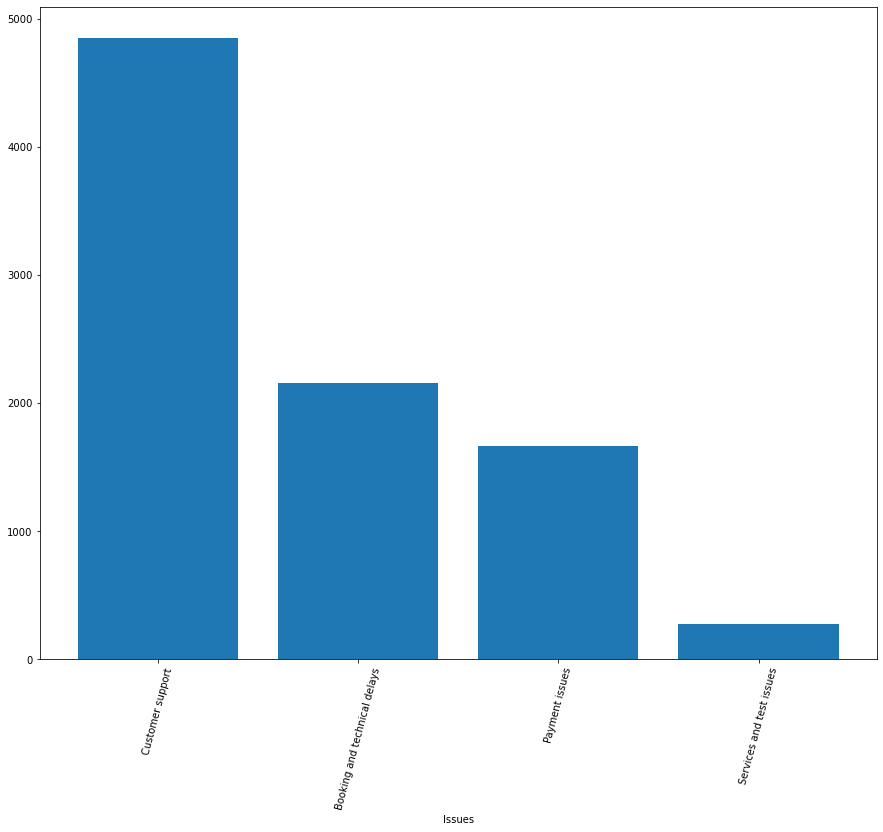

In [122]:
plt.figure(figsize=(15,12))
plt.bar([0,1,2,3], height=df_practo['Issues'].value_counts())
plt.xlabel('Issues')
plt.xticks(ticks=[1,0,3,2], labels=issues, rotation=75)
plt.show()

##### Highest no of issues were observed in terms of customer support(approx 4853), then booking and technical delays , payment issues and lastly services and test issues
##### 

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


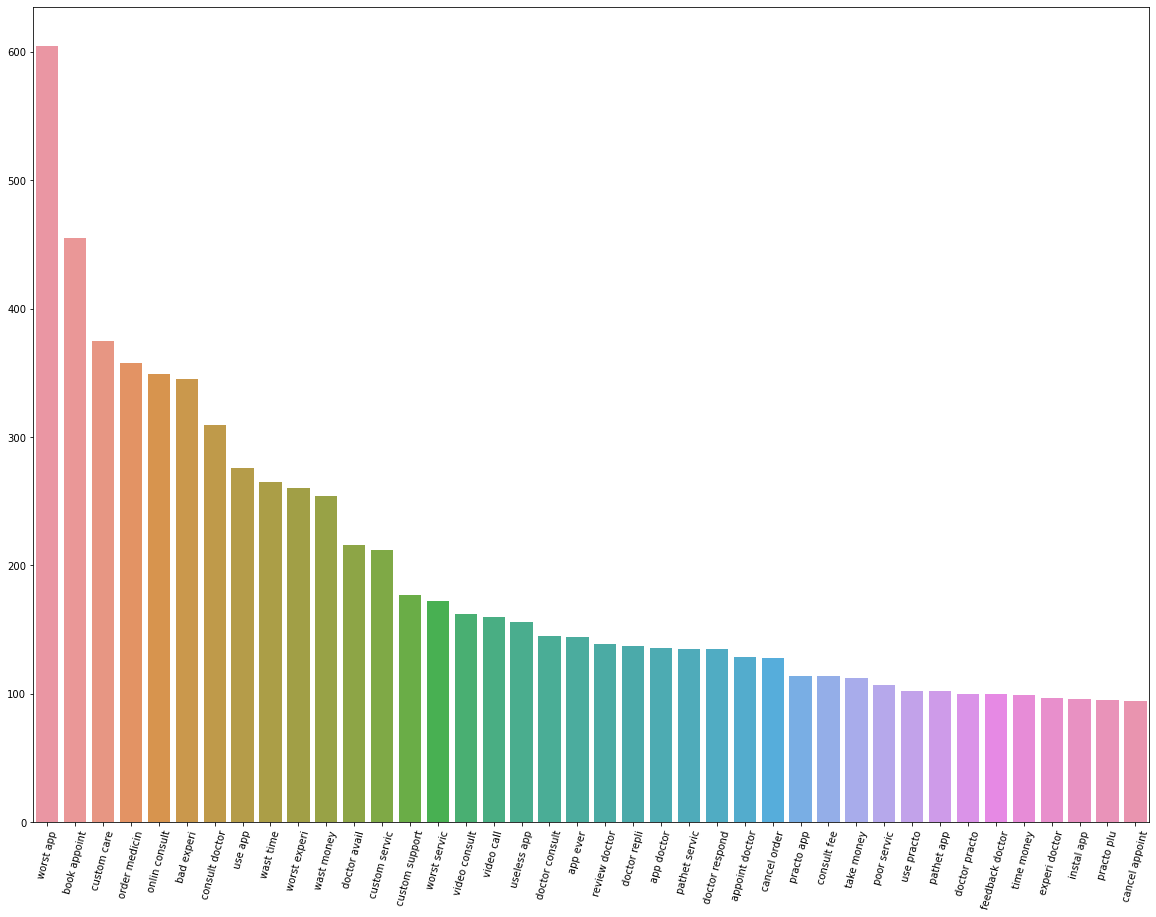

In [80]:
plt.figure(figsize=(20,15))
sns.barplot(list(vocabulary.keys())[:40],list(vocabulary.values())[:40])
plt.xticks(rotation=75)
plt.show()

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


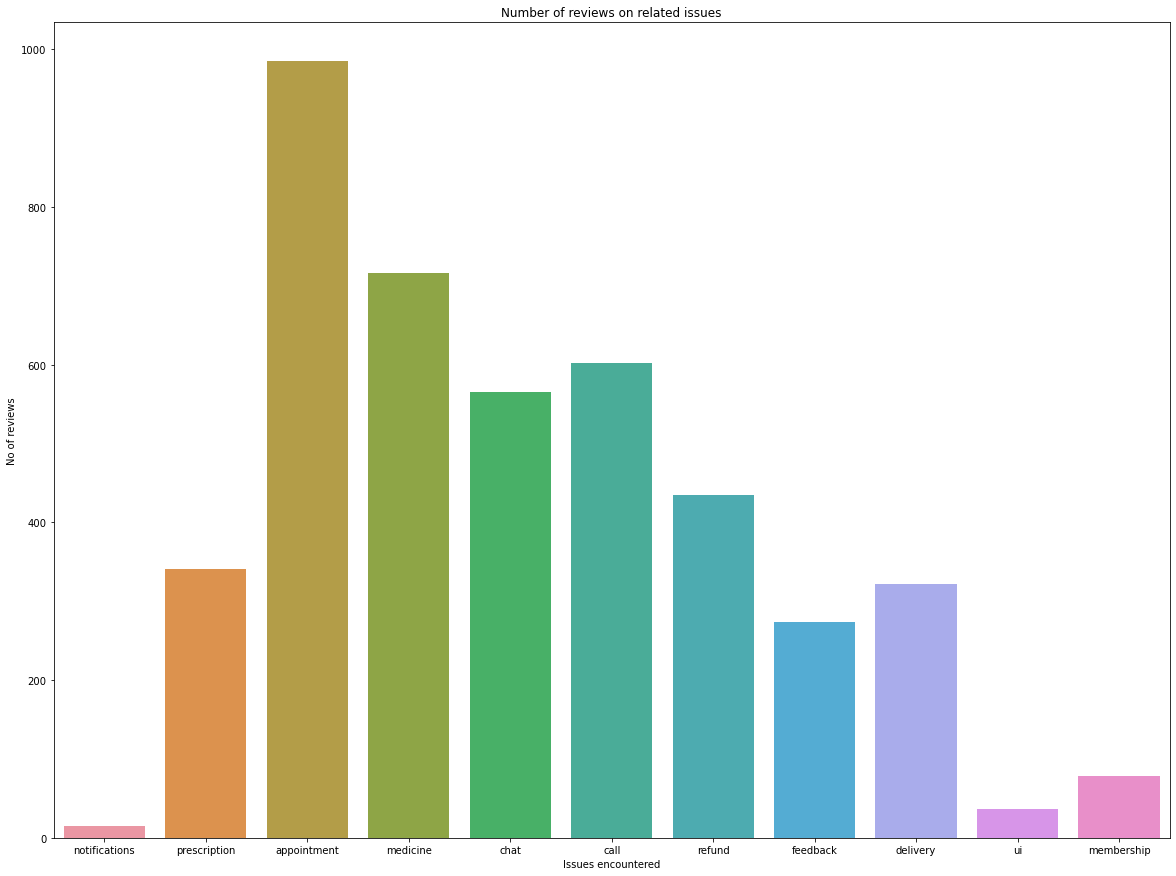

In [117]:
plt.figure(figsize=(20,15))
sns.barplot(list(issue_counts.keys()), list(issue_counts.values()))
plt.title("Number of reviews on related issues")
plt.xlabel("Issues encountered")
plt.ylabel("No of reviews")
plt.show()